# Unsupervised Learning

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/Users/mahaalarifi/dsi3/project4/data.csv')

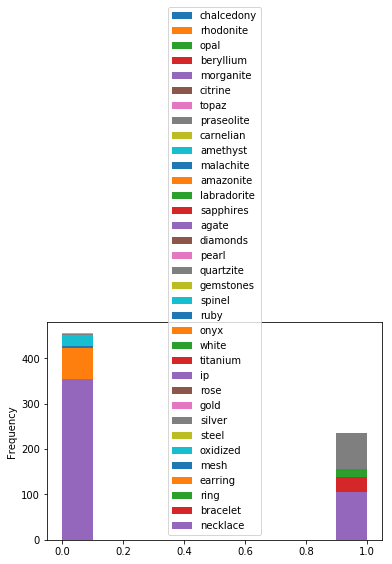

In [21]:
data.plot(kind='hist')

In [29]:
test1 = data.groupby('gold').count()

In [30]:
test1

,chalcedony,rhodonite,opal,beryllium,morganite,citrine,topaz,praseolite,carnelian,amethyst,...,rose,silver,steel,oxidized,mesh,earring,ring,bracelet,necklace,best_seller
gold,,,,,,,,,,,,,,,,,,,,,
0.0,249,249,249,249,249,249,249,249,249,249,...,249,249,249,249,249,249,249,249,249,249
1.0,210,210,210,210,210,210,210,210,210,210,...,210,210,210,210,210,210,210,210,210,210


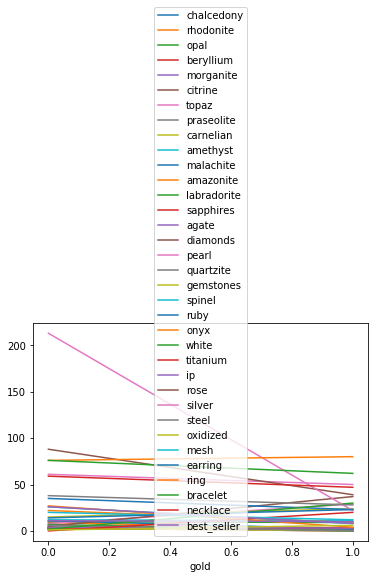

In [28]:
test1.plot()

In [36]:
column_sum = []
for colum in data.columns:
    value = data[colum].sum()
    print (value)
    column_sum.append(value)

7.0
11.0
19.0
3.0
3.0
7.0
37.0
4.0
3.0
23.0
13.0
31.0
7.0
6.0
7.0
42.0
111.0
6.0
39.0
34.0
58.0
31.0
32.0
20.0
21.0
127.0
210.0
235.0
66.0
7.0
32.0
37.0
156.0
138.0
106.0
34


In [42]:
column_sum = pd.DataFrame(column_sum)


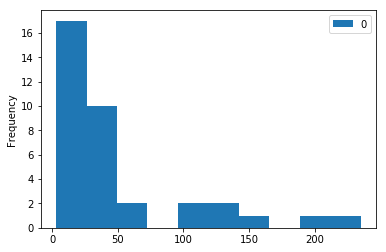

In [45]:
column_sum.plot(kind='hist')

In [46]:
import seaborn as sns

In [49]:
sns.catplot(x=index, y=columns)

NameError: name 'index' is not defined